**TechNova Sales Insights**

**Problem Statement**

Seasonality of Demand: Identify the seasonality of demand for different Merchant Classes (Air Conditioners, TVs, Washing Machines, etc.). Analyse the effect of festive seasons on sales volumes. List of Festive seasons and their corresponding durations every year are provided in the Appendix. Thus, help answer the following:
	Which Merchant Class is most susceptible to seasonal variations and how much is the variation. Which Merchant Class(es) is/are hardly affected by seasonal variationsel


In [1]:
# Importing Essential libraries to work on dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading CSV file into DataFrame
df = pd.read_csv("C:/Users/Omen/OneDrive/Documents/Final Project/TechNova Sales Insights/Cleaned_Customer_Transaction_Data.csv")

Loaded the Cleaned Transaction Data CSV file into the above DataFrame which was created in the EDA Process

In [6]:
# Checking the name of the Columns 
df.columns

Index(['CustID', 'ItemDesc', 'MerchCategoryDescription',
       'MerchClassDescription', 'MerchGroupDescription', 'SaleValue',
       'OrderedQuantity', 'OrderDate', 'SalesChannelCode',
       'Ecom_BnM_Indicator', 'StoreID', 'StoreCode', 'StoreCity', 'StoreState',
       'StorePincode', 'Log_OrderedQuantity', 'Sqrt_SaleValue'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603692 entries, 0 to 1603691
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CustID                    1603692 non-null  object 
 1   ItemDesc                  1603692 non-null  object 
 2   MerchCategoryDescription  1603692 non-null  object 
 3   MerchClassDescription     1603692 non-null  object 
 4   MerchGroupDescription     1603692 non-null  object 
 5   SaleValue                 1603683 non-null  float64
 6   OrderedQuantity           1603692 non-null  float64
 7   OrderDate                 1603692 non-null  object 
 8   SalesChannelCode          1603692 non-null  object 
 9   Ecom_BnM_Indicator        1603692 non-null  object 
 10  StoreID                   1603673 non-null  float64
 11  StoreCode                 1603689 non-null  object 
 12  StoreCity                 1603692 non-null  object 
 13  StoreState                1

In [3]:
# Converting the Data-Types of Respective Columns according to their values
df['MerchClassDescription'] = df['MerchClassDescription'].astype('category')
df['MerchGroupDescription'] = df['MerchGroupDescription'].astype('category')
df['ItemDesc'] = df['ItemDesc'].astype('category')
df['MerchCategoryDescription'] = df['MerchCategoryDescription'].astype('category')
df['CustID'] = df['CustID'].astype('category')
df['OrderDate'] = df['OrderDate'].astype('datetime64[ns]')
df['SalesChannelCode'] = df['SalesChannelCode'].astype('category')
df['Ecom_BnM_Indicator'] = df['Ecom_BnM_Indicator'].astype('category')
df['StoreCode'] = df['StoreCode'].astype('category')
df['StoreCity'] = df['StoreCity'].astype('category')
df['StoreState'] = df['StoreState'].astype('category')
df['StorePincode'] = df['StorePincode'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603692 entries, 0 to 1603691
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   CustID                    1603692 non-null  category      
 1   ItemDesc                  1603692 non-null  category      
 2   MerchCategoryDescription  1603692 non-null  category      
 3   MerchClassDescription     1603692 non-null  category      
 4   MerchGroupDescription     1603692 non-null  category      
 5   SaleValue                 1603683 non-null  float64       
 6   OrderedQuantity           1603692 non-null  float64       
 7   OrderDate                 1603692 non-null  datetime64[ns]
 8   SalesChannelCode          1603692 non-null  category      
 9   Ecom_BnM_Indicator        1603692 non-null  category      
 10  StoreID                   1603673 non-null  float64       
 11  StoreCode                 1603689 non-null  catego

**Now let's start working on our problem statement (Seasonality of Demand)**

To check the seasonality, Dates are very important factor. So we'll extract dates from 'OrderDate'.

In [4]:
# Extracting month and year from OrderDate
df['Month'] = df['OrderDate'].dt.month
df['Year'] = df['OrderDate'].dt.year

List of Festive dates are already provided so making a dictionary accordingly

In [11]:
# Defining the festive dates
festive_dates = {
    'Independence Day': {'2019': ('2019-08-15', '2019-08-15'), '2020': ('2020-08-15', '2020-08-15'), '2021': ('2021-08-15', '2021-08-15')},
    'Republic Day': {'2019': ('2019-01-26', '2019-01-26'), '2020': ('2020-01-26', '2020-01-26'), '2021': ('2021-01-26', '2021-01-26')},
    'Dhanteras': {'2019': ('2019-11-13', '2019-11-13'), '2020': ('2020-11-02', '2020-11-02'), '2021': ('2021-10-22', '2021-10-22')},
    'Vijaya Dashami': {'2019': ('2019-10-25', '2019-10-25'), '2020': ('2020-10-15', '2020-10-15'), '2021': ('2021-10-05', '2021-10-05')},
    'Deepawali': {'2019': ('2019-11-14', '2019-11-15'), '2020': ('2020-11-04', '2020-11-05'), '2021': ('2021-10-24', '2021-10-26')},
    'Christmas': {'2019': ('2019-12-25', '2019-12-25'), '2020': ('2020-12-25', '2020-12-25'), '2021': ('2021-12-25', '2021-12-25')},
    'Father\'s Day': {'2019': ('2019-06-21', '2019-06-21'), '2020': ('2020-06-20', '2020-06-20'), '2021': ('2021-06-19', '2021-06-19')},
    'Mahatma Gandhi Jayanti': {'2019': ('2019-10-02', '2019-10-02'), '2020': ('2020-10-02', '2020-10-02'), '2021': ('2021-10-02', '2021-10-02')},
    'New Years Eve': {'2019': ('2019-12-31', '2019-12-31'), '2020': ('2020-12-31', '2020-12-31'), '2021': ('2021-12-31', '2021-12-31')},
    'Gudi Padwa': {'2019': ('2019-03-25', '2019-03-25'), '2020': ('2020-04-13', '2020-04-13'), '2021': ('2021-04-02', '2021-04-02')}
}

In [12]:
# Converting festive dates to datetime
for fest, years in festive_dates.items():
    for year, dates in years.items():
        festive_dates[fest][year] = [pd.to_datetime(date) for date in dates]

In [13]:
# Making a function to check if a date is within any festive period
def is_festive(date, festive_dates):
    for fest, years in festive_dates.items():
        for year, dates in years.items():
            if dates[0] <= date <= dates[1]:
                return fest
    return None

In [14]:
# Applying the festive check to the data
df['FestivePeriod'] = df['OrderDate'].apply(lambda x: is_festive(x, festive_dates))

In [15]:
df['FestivePeriod']

0                   None
1                   None
2                   None
3                   None
4                   None
               ...      
1603687    New Years Eve
1603688    New Years Eve
1603689    New Years Eve
1603690    New Years Eve
1603691    New Years Eve
Name: FestivePeriod, Length: 1603692, dtype: object

The column 'FestivePeriod' contains the values in which our festive dates matches with the order dates

In [16]:
# Identifying the seasonality of demand for different Merchant Classes
monthly_sales = df.groupby(['Year', 'Month', 'MerchClassDescription']).agg({'SaleValue': 'sum'}).reset_index()
monthly_sales_pivot = monthly_sales.pivot_table(index=['Year', 'Month'], columns='MerchClassDescription', values='SaleValue').fillna(0)

In [17]:
monthly_sales

,Year,Month,MerchClassDescription,SaleValue
0,2019,1,Air Conditioners,1.593234e+07
1,2019,1,Air Purifier,7.125669e+05
2,2019,1,Audio Systems,1.849607e+06
3,2019,1,Brand Free Mobiles,3.000000e-04
4,2019,1,Calculators,0.000000e+00
...,...,...,...,...
2803,2021,12,Travel Accessories,3.830500e+05
2804,2021,12,Washing Machines,4.761756e+07
2805,2021,12,Water Purifiers,7.794853e+06
2806,2021,12,ZIP Air Conditioners,1.685040e+03


pivot_table creates a spreadsheet-style pivot table as a DataFrame which gives the aggregate values in the columns

In [18]:
monthly_sales_pivot

MerchClassDescription  Air Conditioners  Air Purifier  Audio Systems  \
Year Month                                                             
2019 1                     1.593234e+07  7.125669e+05   1.849607e+06   
     2                     2.477195e+07  7.407212e+05   1.209410e+06   
     3                     2.040433e+07  4.583758e+05   4.949537e+05   
     4                     0.000000e+00  0.000000e+00   0.000000e+00   
     5                     2.527517e+07  6.833592e+04   2.715972e+05   
     6                     2.475986e+07  4.550424e+04   7.074925e+05   
     7                     1.966500e+07  1.731625e+05   5.858741e+05   
     8                     1.605293e+07  6.921240e+05   1.535499e+06   
     9                     1.595065e+07  1.606069e+05   9.147415e+05   
     10                    2.187305e+07  1.395783e+06   1.259129e+06   
     11                    1.830049e+07  4.233052e+06   1.077194e+06   
     12                    1.038260e+07  1.601879e+06   1.275854e+06   
2020 1                     2.311828e+07  4.395771e+05   1.564201e+06   
     2                     3.259065e+07  4.422407e+05   9.283766e+05   
     3                     8.893314e+07  3.249827e+05   1.181915e+06   
     4                     5.315627e+07  3.502429e+05   1.082998e+06   
     5                     8.890974e+06  2.068223e+05   1.791559e+05   
     6                     3.439171e+07  4.395827e+05   7.283541e+05   
     7                     3.124307e+07  1.772651e+05   1.534543e+06   
     8                     2.992851e+07  5.414831e+05   1.879337e+06   
     9                     1.892685e+07  3.729804e+05   1.915233e+06   
     10                    3.688564e+07  9.367601e+05   2.919449e+06   
     11                    2.567679e+07  5.081936e+06   1.856406e+06   
     12                    1.837237e+07  3.010480e+06   2.448082e+06   
2021 1                     3.563604e+07  1.541359e+06   2.526906e+06   
     2                     4.331943e+07  7.752836e+05   1.898460e+06   
     3                     1.822463e+08  1.638597e+06   2.062535e+06   
     4                     1.832754e+08  5.192998e+05   3.176380e+06   
     5                     1.481366e+08  4.272432e+05   1.713361e+06   
     6                     7.773589e+07  6.712349e+05   1.686988e+06   
     7                     6.178264e+07  1.068952e+06   3.080577e+06   
     8                     5.543923e+07  1.497648e+06   6.704469e+06   
     9                     4.427418e+07  7.464941e+05   5.321793e+06   
     10                    6.124690e+07  4.625434e+06   6.584934e+06   
     11                    3.280685e+07  5.609408e+06   3.654389e+06   
     12                    3.445891e+07  2.645763e+06   5.665124e+06   

MerchClassDescription  Brand Free Mobiles  Calculators  Computer Bags  \
Year Month                                                              
2019 1                             0.0003       0.0000   5.425070e+05   
     2                         19359.7128       0.0000   3.291097e+05   
     3                             0.0000       0.0000   2.762898e+05   
     4                             0.0000       0.0000   0.000000e+00   
     5                             0.0000       0.0000   9.547972e+04   
     6                         13249.8001       0.0000   2.411522e+05   
     7                             0.0103       0.0000   3.223438e+05   
     8                             0.0000       0.0000   5.397731e+05   
     9                             0.0000       0.0000   4.487302e+05   
     10                        75906.7186       0.0000   6.075026e+05   
     11                       154879.0160       0.0000   7.134474e+05   
     12                           18.3806       0.0000   5.117410e+05   
2020 1                         39015.0006       0.0000   7.357147e+05   
     2                         17313.5107       0.0000   6.890277e+05   
     3                        571689.6025       0.0000   5.728329e+05   
     4                

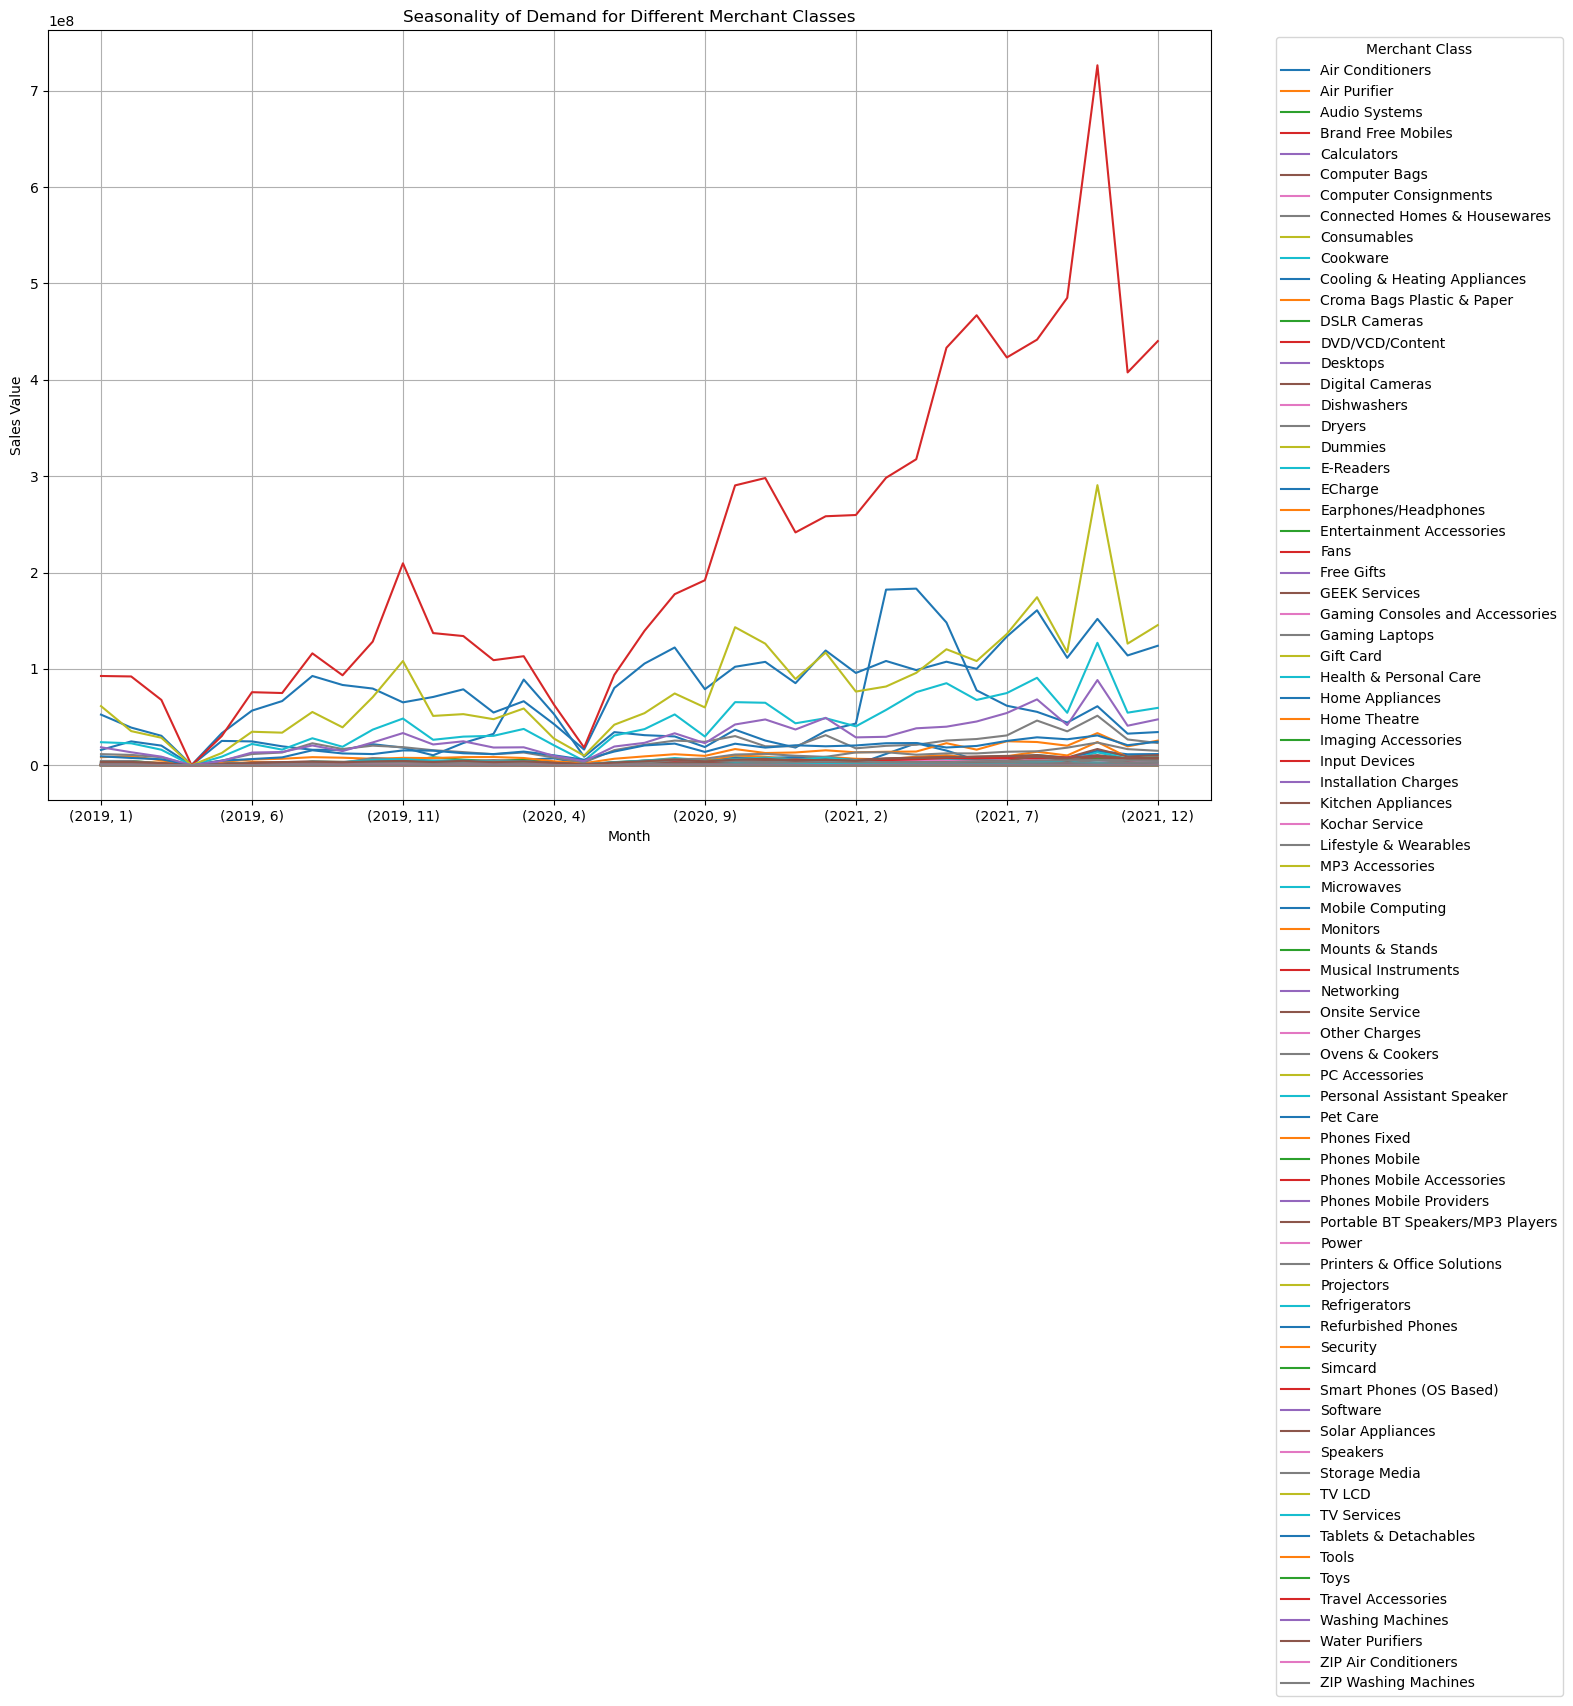

In [19]:
# Plotting the seasonal demand
monthly_sales_pivot.plot(figsize=(15, 10))
plt.title('Seasonality of Demand for Different Merchant Classes')
plt.xlabel('Month')
plt.ylabel('Sales Value')
plt.legend(title='Merchant Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The above Graph shows the seasonality of demand for every Merchant Class.

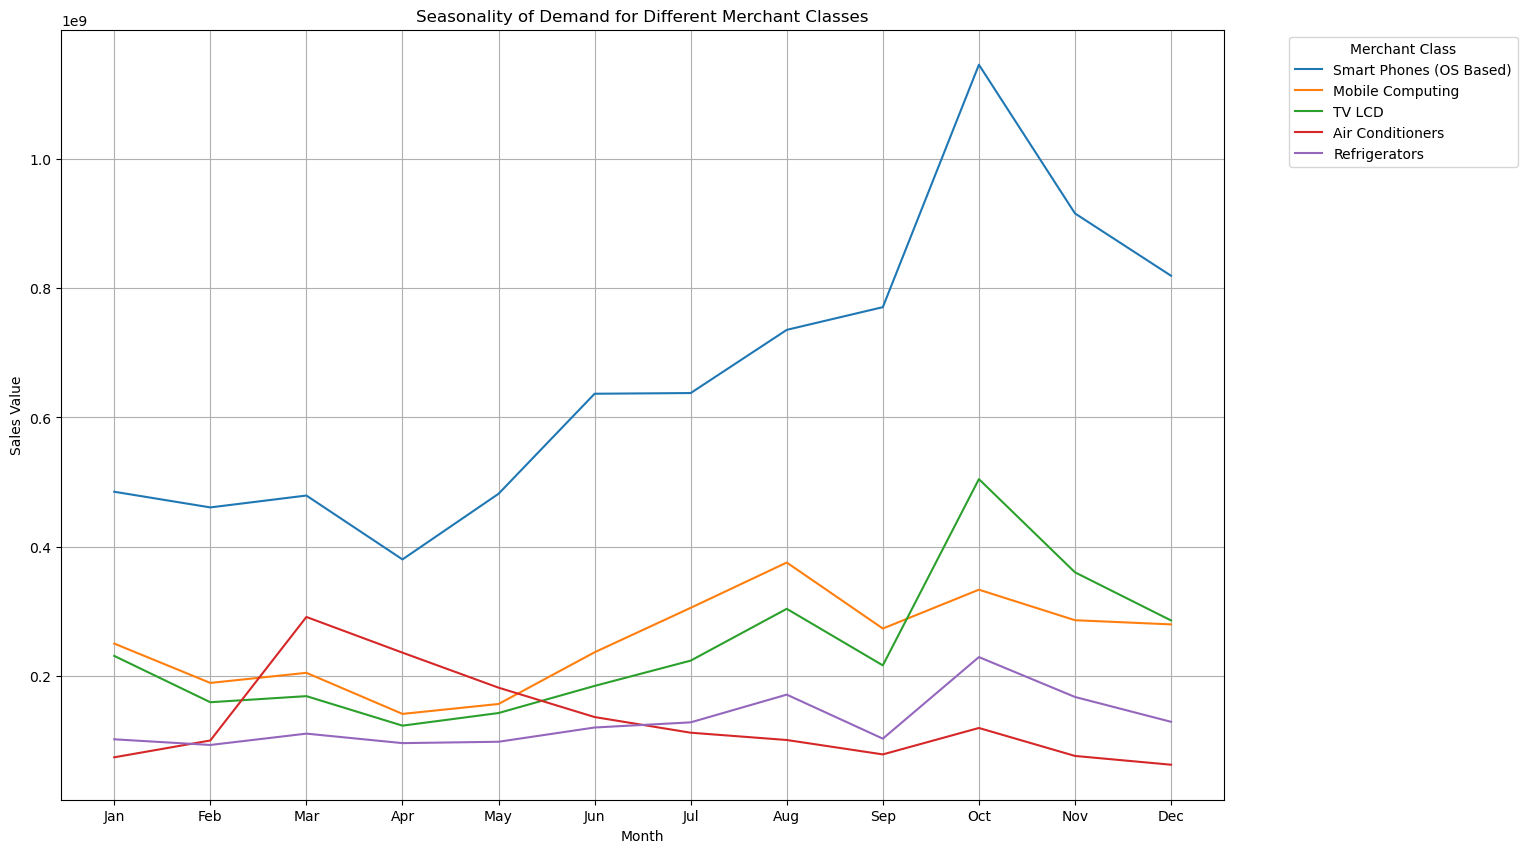

In [20]:
# Getting the sum of the total sales value for each Merchant Class
total_sales = monthly_sales_pivot.sum()

# Sorting the Merchant Classes based on the total sales value
sorted_classes = total_sales.sort_values(ascending=False).index

# Reordering the columns of the monthly_sales_pivot DataFrame
monthly_sales_pivot = monthly_sales_pivot[sorted_classes]

# Filtering the top 5 Merchant Classes
top_n = 5
top_classes = sorted_classes[:top_n]
monthly_sales_pivot = monthly_sales_pivot[top_classes]

# Aggregating data by month across all years for readability
monthly_sales_agg = monthly_sales_pivot.groupby(level='Month').sum()

# Plotting the seasonal demand
ax = monthly_sales_agg.plot(figsize=(15, 10))
plt.title('Seasonality of Demand for Different Merchant Classes')
plt.xlabel('Month')
plt.ylabel('Sales Value')
plt.legend(title='Merchant Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

**The above Graph shows the TOP 5 Merchant classes which are highly affected by the Festive Seasons**

In [21]:
# Identifying Merchant Classes most susceptible to seasonal variations
seasonal_variation = monthly_sales.groupby('MerchClassDescription')['SaleValue'].std().reset_index().sort_values(by='SaleValue', ascending=False)
print(seasonal_variation)

      MerchClassDescription     SaleValue
63  Smart Phones (OS Based)  1.675668e+08
68                   TV LCD  5.630147e+07
0          Air Conditioners  4.354293e+07
40         Mobile Computing  3.649800e+07
59            Refrigerators  2.681866e+07
..                      ...           ...
76     ZIP Air Conditioners  2.808400e+02
6     Computer Consignments  1.606005e+02
62                  Simcard  1.019820e+02
77     ZIP Washing Machines  7.531002e+01
20                  ECharge  5.003156e-01

[78 rows x 2 columns]


In [22]:
# Identifying Merchant Classes hardly affected by seasonal variations
print(seasonal_variation.tail())

    MerchClassDescription   SaleValue
76   ZIP Air Conditioners  280.840033
6   Computer Consignments  160.600510
62                Simcard  101.981977
77   ZIP Washing Machines   75.310017
20                ECharge    0.500316


**From our above Analysis we can see that the Merchant Class which are most affected by seasonal variations are :-**

- Smart Phones (OS Based)

- TV LCD

- Air Conditioners

- Mobile Computing

- Refrigerator

**And the Merchant Class which are hardly affected by seasonal variations are :-** 

- ZIP Air Conditioners

- Computer Consignments

- Simcard

- ZIP Washing Machines

- EChargargetors

**Problem Statement:- Sales of which Merchant Class(es) is/are highly affected by Diwali. Quantify sales revenue during Diwali as a percentage of total annual sales revenue for each Merchant Class for each year.**

In [23]:
# Calculating sales during Diwali
diwali_sales = df[df['FestivePeriod'] == 'Deepawali'].groupby(['Year', 'MerchClassDescription']).agg({'SaleValue': 'sum'}).reset_index()
total_annual_sales = df.groupby(['Year', 'MerchClassDescription']).agg({'SaleValue': 'sum'}).reset_index()

In [24]:
diwali_sales

,Year,MerchClassDescription,SaleValue
0,2019,Air Conditioners,1.879932e+06
1,2019,Air Purifier,5.279872e+05
2,2019,Audio Systems,9.674333e+04
3,2019,Brand Free Mobiles,5.609082e+04
4,2019,Calculators,0.000000e+00
...,...,...,...
229,2021,Travel Accessories,2.899167e+04
230,2021,Washing Machines,1.116281e+07
231,2021,Water Purifiers,1.394839e+06
232,2021,ZIP Air Conditioners,0.000000e+00


'diwali_sales' shows the aggregate of the Sales Value only during the period of 'Deepawali'.

In [25]:
total_annual_sales

,Year,MerchClassDescription,SaleValue
0,2019,Air Conditioners,2.133684e+08
1,2019,Air Purifier,1.028211e+07
2,2019,Audio Systems,1.118135e+07
3,2019,Brand Free Mobiles,2.634136e+05
4,2019,Calculators,0.000000e+00
...,...,...,...
229,2021,Travel Accessories,3.245310e+06
230,2021,Washing Machines,5.729271e+08
231,2021,Water Purifiers,9.317777e+07
232,2021,ZIP Air Conditioners,1.685040e+03


To quantify sales revenue during Diwali as a percentage of total annual sales revenue for each Merchant Class for each year we need to merge the 'Diwali_sales' along with 'total_annual_sales'.

In [26]:
# Merging to calculate the percentage
diwali_sales_percentage = diwali_sales.merge(total_annual_sales, on=['Year', 'MerchClassDescription'], suffixes=('_Diwali', '_Total'))
diwali_sales_percentage['DiwaliSalesPercentage'] = (diwali_sales_percentage['SaleValue_Diwali'] / diwali_sales_percentage['SaleValue_Total']) * 100

In [27]:
diwali_sales_percentage

,Year,MerchClassDescription,SaleValue_Diwali,SaleValue_Total,DiwaliSalesPercentage
0,2019,Air Conditioners,1.879932e+06,2.133684e+08,0.881074
1,2019,Air Purifier,5.279872e+05,1.028211e+07,5.135007
2,2019,Audio Systems,9.674333e+04,1.118135e+07,0.865220
3,2019,Brand Free Mobiles,5.609082e+04,2.634136e+05,21.293818
4,2019,Calculators,0.000000e+00,0.000000e+00,NaN
...,...,...,...,...,...
229,2021,Travel Accessories,2.899167e+04,3.245310e+06,0.893340
230,2021,Washing Machines,1.116281e+07,5.729271e+08,1.948383
231,2021,Water Purifiers,1.394839e+06,9.317777e+07,1.496966
232,2021,ZIP Air Conditioners,0.000000e+00,1.685040e+03,0.000000


**Visualizing the above problem statement using Graph for better understanding**

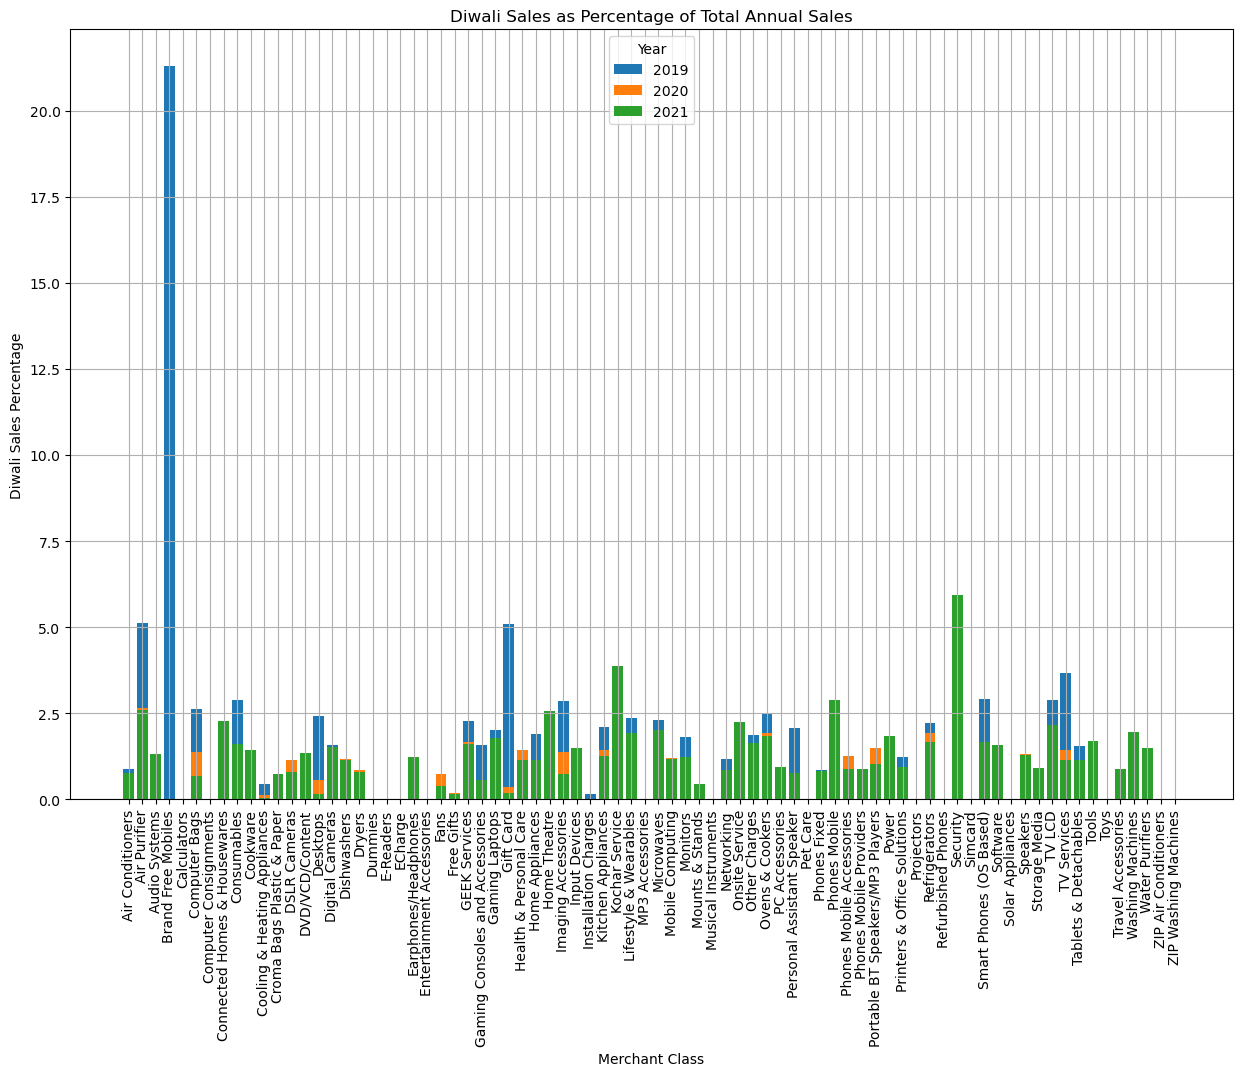

In [28]:
# Plotting Diwali sales as a percentage of total annual sales
plt.figure(figsize=(15, 10))
for year in diwali_sales_percentage['Year'].unique():
    subset = diwali_sales_percentage[diwali_sales_percentage['Year'] == year]
    plt.bar(subset['MerchClassDescription'], subset['DiwaliSalesPercentage'], label=str(year))
plt.title('Diwali Sales as Percentage of Total Annual Sales')
plt.xlabel('Merchant Class')
plt.ylabel('Diwali Sales Percentage')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper center')
plt.grid(True)
plt.show()

In [29]:
diwali_sales.sort_values(by='SaleValue', ascending=False).head(20)

,Year,MerchClassDescription,SaleValue
219,2021,Smart Phones (OS Based),8.303236e+07
224,2021,TV LCD,3.447447e+07
63,2019,Smart Phones (OS Based),3.256678e+07
141,2020,Smart Phones (OS Based),2.315413e+07
196,2021,Mobile Computing,1.676335e+07
146,2020,TV LCD,1.665994e+07
68,2019,TV LCD,1.532053e+07
215,2021,Refrigerators,1.388750e+07
118,2020,Mobile Computing,1.119840e+07
230,2021,Washing Machines,1.116281e+07


**From our above Analysis we can see that the Merchant Class which are most affected by Diwali are :-**
- Smart Phones (OS Based)

- TV LCD

- Mobile Computing

- Refrigerators


In [30]:
# Saving the results to an Excel file
with pd.ExcelWriter('seasonality_of_demand_analysis.xlsx') as writer:
    monthly_sales_pivot.to_excel(writer, sheet_name='Monthly_Sales')
    diwali_sales_percentage.to_excel(writer, sheet_name='Diwali_Sales_Percentage')
    seasonal_variation.to_excel(writer, sheet_name='Seasonal_Variation')

**Problem Statement**

**Product Segmentation:** For the Merchant Categories specified below, classify different brands/products as to whether they belong to Premium (top 33%), Mainstream (middle 33%) and Value (bottom 33%) – based on the price of that product. Accordingly, for each year, tabulate the sales volume and revenue for each product segment (Premium, Mainstream, Value) across the different Merchant Categories. The 3 Merchant Categories to be analysed for this exercise are: TVs, Laptops and Mobile Phones. 

In [5]:
# Filtering for the specified Merchant Categories
categories_to_analyze = ['Mobile Computing', 'Smart Phones (OS Based)', 'Gaming Laptops','TV LCD','Phones Mobile']
filtered_data = df[df['MerchClassDescription'].isin(categories_to_analyze)]

In [7]:
filtered_data['MerchClassDescription'].unique()

['Mobile Computing', 'Smart Phones (OS Based)', 'Gaming Laptops', 'TV LCD', 'Phones Mobile']
Categories (78, object): ['Air Conditioners', 'Air Purifier', 'Audio Systems', 'Brand Free Mobiles', ..., 'Washing Machines', 'Water Purifiers', 'ZIP Air Conditioners', 'ZIP Washing Machines']

In [32]:
# Calculating the segmentation thresholds
# Initializing an empty dictionary to store the thresholds for each category
segmentation_thresholds = {}
# Looping through each category in the list of categories to analyze
for category in categories_to_analyze:
    category_data = filtered_data[filtered_data['MerchClassDescription'] == category]
    # Calculating the 33rd and 67th percentile thresholds for SaleValue in the current category
    thresholds = category_data['SaleValue'].quantile([0.33, 0.67]).values
    # Storing the thresholds in the dictionary with the category as the key
    segmentation_thresholds[category] = thresholds

segmentation_thresholds

{'Mobile Computing': array([ 1324.9801, 44869.8001]),
 'Smart Phones (OS Based)': array([13249.8001, 30589.8001]),
 'Gaming Laptops': array([58130.8201, 72588.5551]),
 'TV LCD': array([ 8659.8001, 33457.0201]),
 'Phones Mobile': array([1324.9801, 1477.9801])}

The above output shows the 'threshold value for 33rd percentile' and 'threshold value for 67th percentile' for the selected merchant categories.

In [33]:
# Defining a function to classify products using vectorized operations
def classify_products(df):
    conditions = []
    for category in categories_to_analyze:
        category_data = df[df['MerchClassDescription'] == category]
        thresholds = segmentation_thresholds[category]
        
        conditions.append(
            (df['MerchClassDescription'] == category) &
            (df['SaleValue'] <= thresholds[0])
        )
        conditions.append(
            (df['MerchClassDescription'] == category) &
            (df['SaleValue'] > thresholds[0]) &
            (df['SaleValue'] <= thresholds[1])
        )
        conditions.append(
            (df['MerchClassDescription'] == category) &
            (df['SaleValue'] > thresholds[1])
        )
    
    choices = ['Value', 'Mainstream', 'Premium'] * len(categories_to_analyze)
    
    df['Segment'] = np.select(conditions, choices, default=np.nan)
    return df

# Applying the function to classify products
filtered_data = classify_products(filtered_data)

The 33rd percentile (0.33) separates the bottom 33% (Value segment) from the middle 67% and the 67th percentile (0.67) separates the top 33% (Premium segment) from the middle 67% and the rest goes to (Mainstream segment).

In [34]:
filtered_data

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,...,StoreCode,StoreCity,StoreState,StorePincode,Log_OrderedQuantity,Sqrt_SaleValue,Month,Year,FestivePeriod,Segment
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,25398.0001,1.0001,2019-01-01,RS,B&M,...,A129,Pune,Maharashtra,411014,0.0001,159.367500,1,2019,None,Mainstream
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,Computers Peripherals,193703.1001,1.0001,2019-01-01,RS,B&M,...,A129,Pune,Maharashtra,411014,0.0001,440.117144,1,2019,None,Premium
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.9801,1.0001,2019-01-01,RS,B&M,...,A122,Ghaziabad,Delhi NCR,201001,0.0001,162.846492,1,2019,None,Mainstream
4,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,DELL New bag pack,DELL New bag pack,Mobile Computing,Computers Peripherals,1120.9801,1.0001,2019-01-01,RS,B&M,...,A010,Surat,Gujarat,395007,0.0001,33.481041,1,2019,None,Value
7,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,Gaming Laptops,Computers Peripherals,66085.8001,1.0001,2019-01-01,RS,B&M,...,A032,New Delhi,Delhi NCR,110007,0.0001,257.071586,1,2019,None,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603682,1ERAtFMMGG7eA8EJERJJAGFJHVMEV8GR,Samsung Galaxy A53 (8GB+128GB) Black,Samsung Galaxy A53 (8GB+128GB) Black,Smart Phones (OS Based),Communication,32460.5311,1.0001,2021-12-31,RS,B&M,...,A185,Davanagere,Karnataka,577001,0.0001,180.168063,12,2021,New Years Eve,Premium
1603683,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,APPLE PROTETC+WITH ACS IPHONE 14 PRO MAX,APPLE PROTETC+WITH ACS IPHONE 14 PRO MAX,Smart Phones (OS Based),Communication,16472.0311,1.0001,2021-12-31,RS,B&M,...,A231,Mehsana,Gujarat,384002,0.0001,128.343411,12,2021,New Years Eve,Mainstream
1603684,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,Apple iPhone 14 Pro Max 256GB DeepPurple,Apple iPhone 14 Pro Max 256GB DeepPurple,Smart Phones (OS Based),Communication,148399.8001,1.0001,2021-12-31,RS,B&M,...,A231,Mehsana,Gujarat,384002,0.0001,385.226946,12,2021,New Years Eve,Premium
1603688,VG8FJjo7HJH7118AF7JHGV1FE1tMjJMG,SAMSUNG LED 189CM 75AU7700 UHD/4K,SAMSUNG LED 189CM 75AU7700 UHD/4K,TV LCD,Entertainment,111424.8001,1.0001,2021-12-31,RS,B&M,...,A348,Indore,Madhya Pradesh,452016,0.0001,333.803535,12,2021,New Years Eve,Premium


For the selected Merchant Categories, classification of different brands/products as to whether they belong to Premium (top 33%), Mainstream (middle 33%) and Value (bottom 33%) – based on the price of that product has been done in 'filtered_data'

**Now tabulating the sales volume and revenue for each product segment (Premium, Mainstream, Value) across the different Merchant Categories.**

In [35]:
# Aggregating sales volume and revenue by segment and year
aggregated_data = filtered_data.groupby(['Year', 'MerchClassDescription', 'Segment']).agg(
    SalesVolume=('OrderedQuantity', 'sum'),
    Revenue=('SaleValue', 'sum')
).reset_index()

In [36]:
aggregated_data.sort_values(by='SalesVolume',ascending=False)

,Year,MerchClassDescription,Segment,SalesVolume,Revenue
876,2021,Smart Phones (OS Based),Mainstream,53468.3463,1.113811e+09
877,2021,Smart Phones (OS Based),Premium,52503.2498,3.563889e+09
878,2021,Smart Phones (OS Based),Value,45951.5957,2.801665e+08
566,2020,Smart Phones (OS Based),Value,24278.4323,1.443109e+08
898,2021,TV LCD,Value,20614.0613,8.943203e+07
...,...,...,...,...,...
323,2020,Audio Systems,nan,0.0000,0.000000e+00
324,2020,Brand Free Mobiles,Mainstream,0.0000,0.000000e+00
325,2020,Brand Free Mobiles,Premium,0.0000,0.000000e+00
326,2020,Brand Free Mobiles,Value,0.0000,0.000000e+00


Now Visualizing the above statement using graphs for each category.

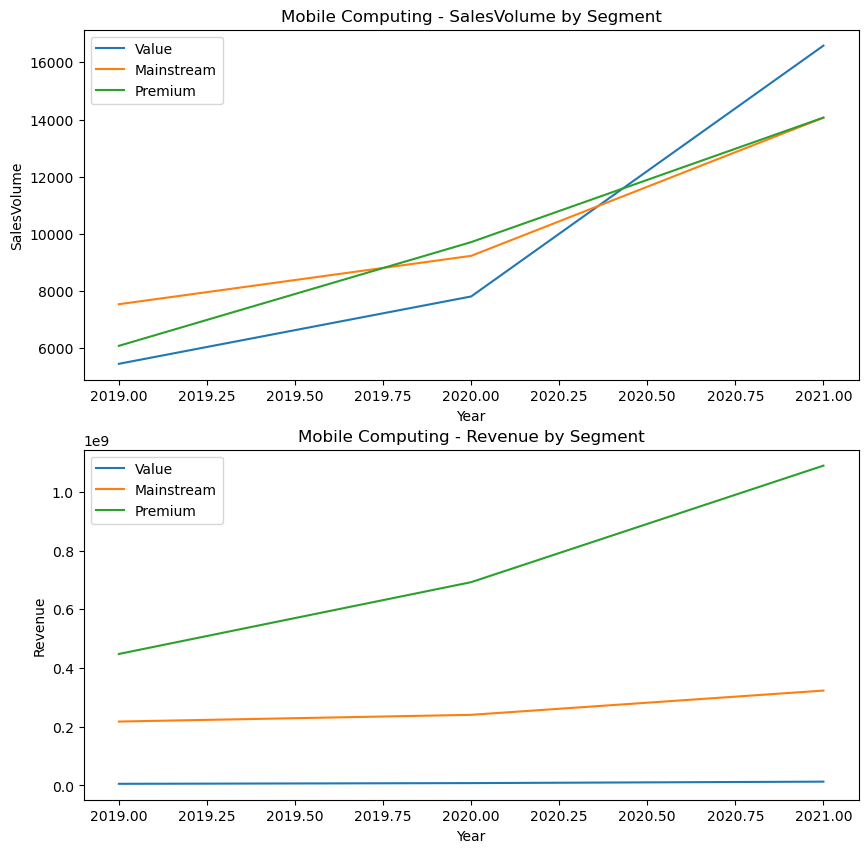

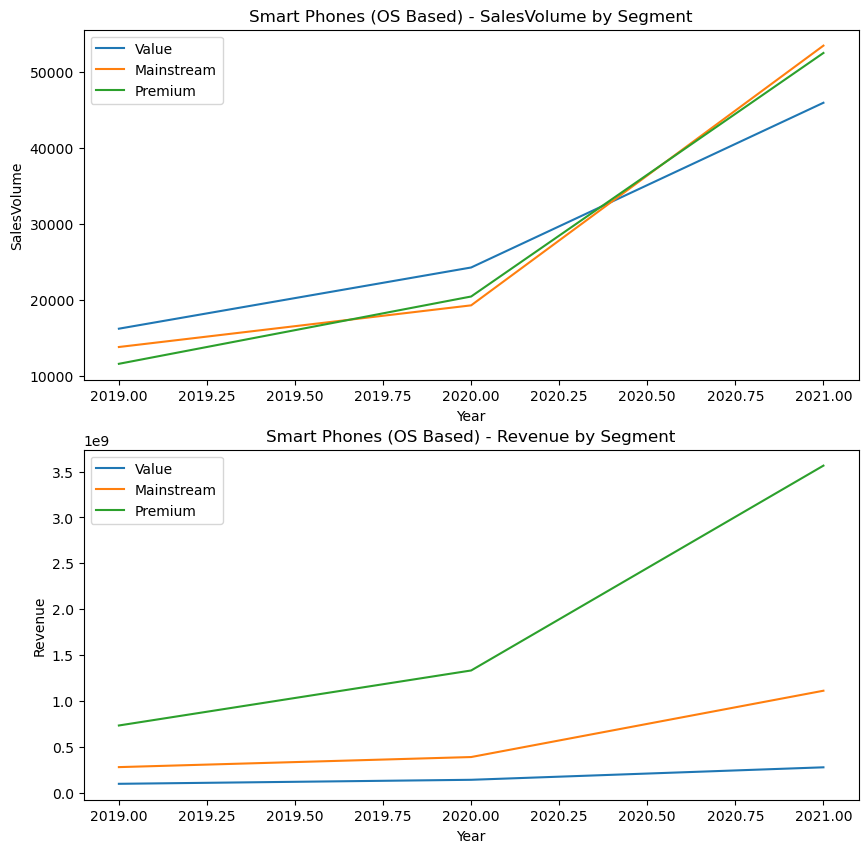

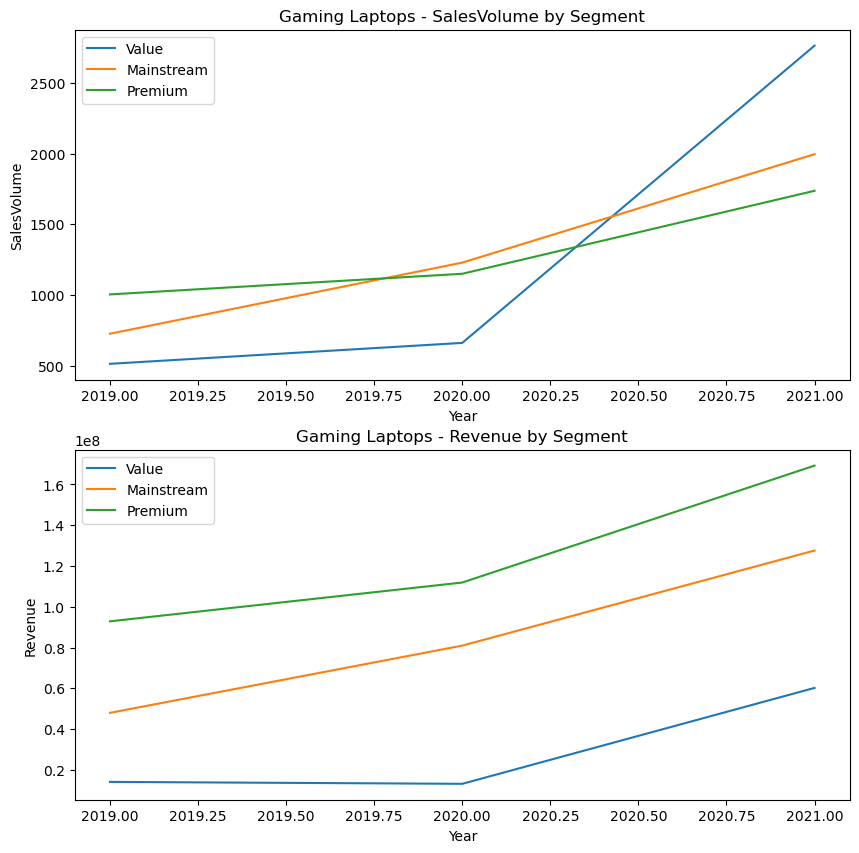

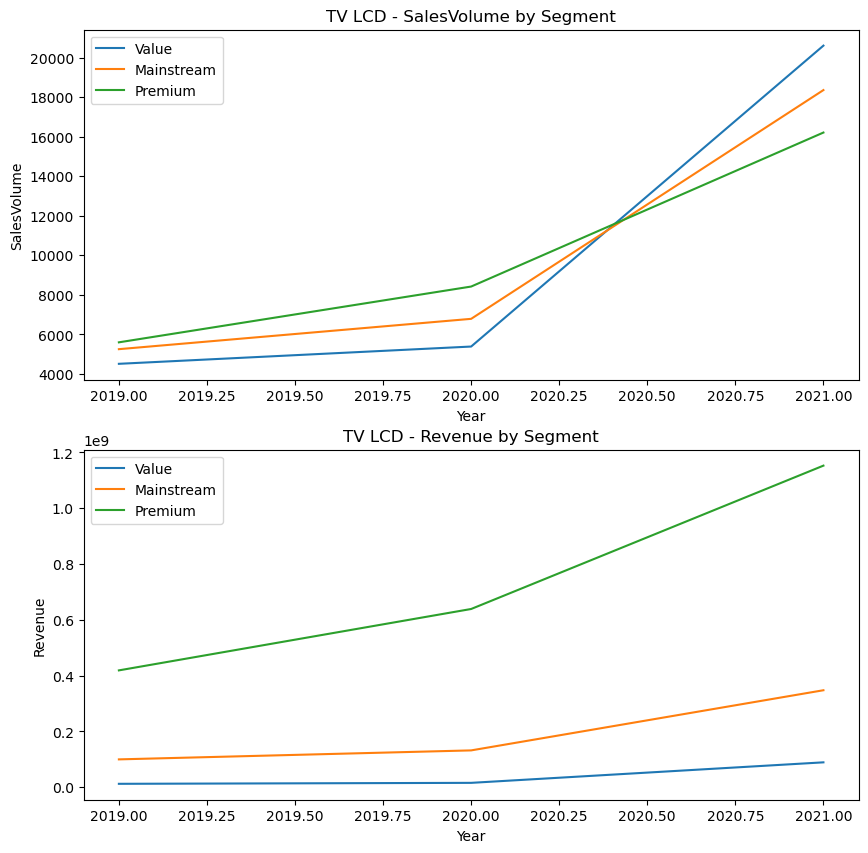

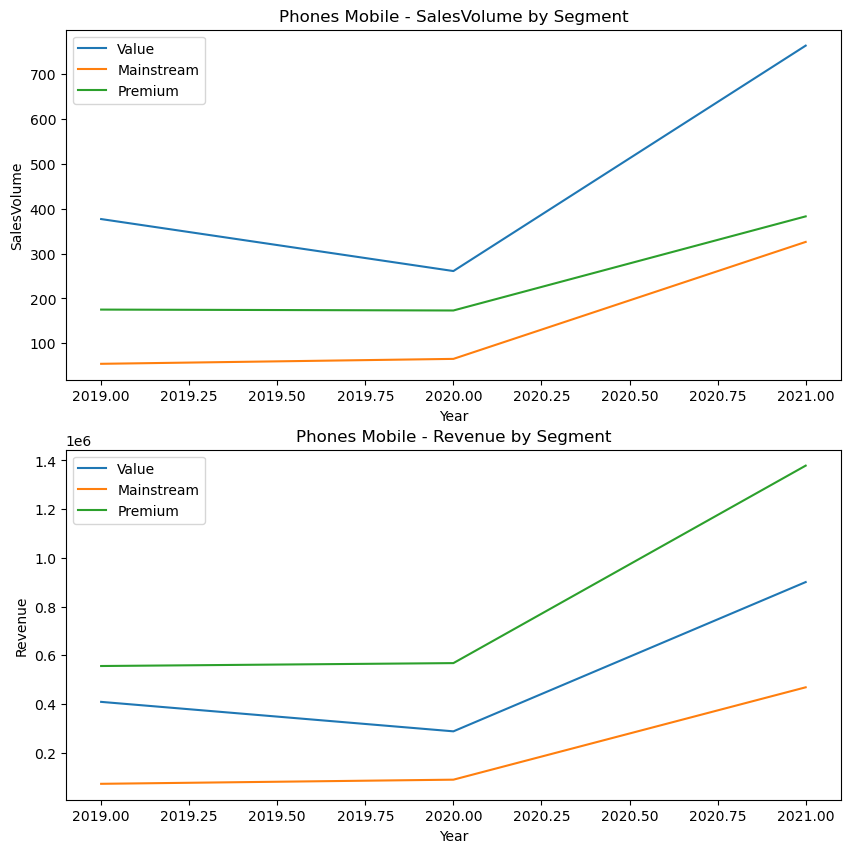

In [37]:
# Creating charts for each category
for category in categories_to_analyze:
    category_data = aggregated_data[aggregated_data['MerchClassDescription'] == category]
        
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
        
    for i, metric in enumerate(['SalesVolume', 'Revenue']):
        for segment in ['Value', 'Mainstream', 'Premium']:
            segment_data = category_data[category_data['Segment'] == segment]
            ax[i].plot(segment_data['Year'], segment_data[metric], label=segment)
            
            ax[i].set_title(f'{category} - {metric} by Segment')
            ax[i].set_xlabel('Year')
            ax[i].set_ylabel(metric)
            ax[i].legend()
        
    fig.show()

**The above carts shows a detailed view of different merchant categories categorized by different segments (Value, Mainstream, Premium) to SalesVolume and Revenue for each year.**

In [38]:
# Saving the results to an Excel file
with pd.ExcelWriter('Product_Segmentation_Analysis.xlsx') as writer:
    filtered_data.to_excel(writer, sheet_name= 'Filtered Data', index=False)
    aggregated_data.to_excel(writer, sheet_name='Aggregated Data', index=False)

**SQL Queries**

**Query No 1**

**Return the Cust ID that received the 5th highest number of campaigns for the entire duration (using only the campaign data)**

In [59]:
#By running the below code cell it will open the file using the default application associated with sql files.

import os

file_path_1 = r'C:/Users/Omen/OneDrive/Documents/Final Project/TechNova Sales Insights/SQL Queries/SQL Query No 1.sql'
os.startfile(file_path_1)

**Query No 2**

**Find the States for which the average time of delivery from Sale Timestamp to Delivered Timestamp is the minimum and the maximum respectively. Use the Delivery data for this and only those records for which Sale Timestamp, Delivery Timestamp and Ship to State – all variables are populated.**

In [40]:
#By running the below code cell it will open the file using the default application associated with sql files.

import os

file_path_2 = r'C:/Users/Omen/OneDrive/Documents/Final Project/TechNova Sales Insights/SQL Queries/SQL Query No 2.sql'
os.startfile(file_path_2)

**Query No 3**

**Create a dataset of customer ids whose monthly transaction amount has increased every month for at least 3 consecutive months.** 

In [41]:
#By running the below code cell it will open the file using the default application associated with sql files.

import os

file_path_3 = r'C:/Users/Omen/OneDrive/Documents/Final Project/TechNova Sales Insights/SQL Queries/SQL Query No 3.sql'
os.startfile(file_path_3)

**Product Assortment**

**Problem Statement :- For the top 5 Brick and Mortar Stores across India, what is the distribution of sales for the most recent 6 months of data across the different Merchant Categories and their corresponding segments (Premium, Mainstream, Value) which would help understand which categories and corresponding segments each of the different stores should stock-up on based on historical demand of products across these stores.**   

For above Product Assortment we will be using filtered_data in which we have segments columns too.

In [60]:
# Creating new DataFrame without affecting our original data stored in filtered_data
# Also dropping column 'FestivePeriod' because it contains many NaN values which can affect our analysis.
df_pa = filtered_data.drop(columns=['FestivePeriod'])

In [62]:
#df_pa.to_csv('filtered_data.csv', index=False)

In [43]:
df_pa

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Log_OrderedQuantity,Sqrt_SaleValue,Month,Year,Segment
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,25398.0001,1.0001,2019-01-01,RS,B&M,83.0,A129,Pune,Maharashtra,411014,0.0001,159.367500,1,2019,Mainstream
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,Computers Peripherals,193703.1001,1.0001,2019-01-01,RS,B&M,83.0,A129,Pune,Maharashtra,411014,0.0001,440.117144,1,2019,Premium
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.9801,1.0001,2019-01-01,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001,0.0001,162.846492,1,2019,Mainstream
4,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,DELL New bag pack,DELL New bag pack,Mobile Computing,Computers Peripherals,1120.9801,1.0001,2019-01-01,RS,B&M,8.0,A010,Surat,Gujarat,395007,0.0001,33.481041,1,2019,Value
7,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,Gaming Laptops,Computers Peripherals,66085.8001,1.0001,2019-01-01,RS,B&M,24.0,A032,New Delhi,Delhi NCR,110007,0.0001,257.071586,1,2019,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603682,1ERAtFMMGG7eA8EJERJJAGFJHVMEV8GR,Samsung Galaxy A53 (8GB+128GB) Black,Samsung Galaxy A53 (8GB+128GB) Black,Smart Phones (OS Based),Communication,32460.5311,1.0001,2021-12-31,RS,B&M,136.0,A185,Davanagere,Karnataka,577001,0.0001,180.168063,12,2021,Premium
1603683,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,APPLE PROTETC+WITH ACS IPHONE 14 PRO MAX,APPLE PROTETC+WITH ACS IPHONE 14 PRO MAX,Smart Phones (OS Based),Communication,16472.0311,1.0001,2021-12-31,RS,B&M,224.0,A231,Mehsana,Gujarat,384002,0.0001,128.343411,12,2021,Mainstream
1603684,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,Apple iPhone 14 Pro Max 256GB DeepPurple,Apple iPhone 14 Pro Max 256GB DeepPurple,Smart Phones (OS Based),Communication,148399.8001,1.0001,2021-12-31,RS,B&M,224.0,A231,Mehsana,Gujarat,384002,0.0001,385.226946,12,2021,Premium
1603688,VG8FJjo7HJH7118AF7JHGV1FE1tMjJMG,SAMSUNG LED 189CM 75AU7700 UHD/4K,SAMSUNG LED 189CM 75AU7700 UHD/4K,TV LCD,Entertainment,111424.8001,1.0001,2021-12-31,RS,B&M,668.0,A348,Indore,Madhya Pradesh,452016,0.0001,333.803535,12,2021,Premium


In [44]:
# Filtering data for the most recent 6 months
most_recent_date = df_pa['OrderDate'].max()
six_months_ago = most_recent_date - pd.DateOffset(months=6)
recent_data = df_pa[df_pa['OrderDate'] >= six_months_ago]

In [45]:
most_recent_date

Timestamp('2021-12-31 00:00:00')

'most_recent_date' will give us last date in our dataframe (most recent) and
'six_months_ago' will subtract 6 months from recent date and 
'recent_data' will give us last (most recent) 6 months data.

In [46]:
recent_data

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Log_OrderedQuantity,Sqrt_SaleValue,Month,Year,Segment
16178,1AFoF1JjEjE78GHjEVtG77JVVoeA8Joj,Dell Inspiron G15 (D560826WIN9G) Core i5 11th ...,Dell Inspiron G15 (D560826WIN9G) Core i5 11th ...,Gaming Laptops,Computers Peripherals,73194.2311,1.0001,2021-06-30,EC,Ecom,164.0,A217,Surat,Gujarat,395007,0.0001,270.544324,6,2021,Premium
16183,te18Je8V7FeHMeFojtVoV1EMFH7HEtoG,Apple iPhone 12 128GB White,Apple iPhone 12 128GB White,Smart Phones (OS Based),Communication,62209.8001,1.0001,2021-06-30,RS,B&M,19.0,A024,Ghaziabad,Delhi NCR,201001,0.0001,249.418925,6,2021,Premium
16186,eVFeeGttRM18Jt8FHEFottGVMjEM8eRJ,2 Yr Ongo EW Televisions-20K-30K New,2 Yr Ongo EW Televisions-20K-30K New,TV LCD,Entertainment,2810.1001,1.0001,2021-06-30,RS,B&M,46.0,A058,Bangalore,Karnataka,560095,0.0001,53.010377,6,2021,Value
16187,eVFeeGttRM18Jt8FHEFottGVMjEM8eRJ,Component Care Tv Screen - 18K-26K,Component Care Tv Screen - 18K-26K,TV LCD,Entertainment,713.4901,1.0001,2021-06-30,RS,B&M,46.0,A058,Bangalore,Karnataka,560095,0.0001,26.711235,6,2021,Value
16188,eVFeeGttRM18Jt8FHEFottGVMjEM8eRJ,LG LED 80CM 32LQ573 HD READY,LG LED 80CM 32LQ573 HD READY,TV LCD,Entertainment,21104.8201,1.0001,2021-06-30,RS,B&M,46.0,A058,Bangalore,Karnataka,560095,0.0001,145.274981,6,2021,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603682,1ERAtFMMGG7eA8EJERJJAGFJHVMEV8GR,Samsung Galaxy A53 (8GB+128GB) Black,Samsung Galaxy A53 (8GB+128GB) Black,Smart Phones (OS Based),Communication,32460.5311,1.0001,2021-12-31,RS,B&M,136.0,A185,Davanagere,Karnataka,577001,0.0001,180.168063,12,2021,Premium
1603683,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,APPLE PROTETC+WITH ACS IPHONE 14 PRO MAX,APPLE PROTETC+WITH ACS IPHONE 14 PRO MAX,Smart Phones (OS Based),Communication,16472.0311,1.0001,2021-12-31,RS,B&M,224.0,A231,Mehsana,Gujarat,384002,0.0001,128.343411,12,2021,Mainstream
1603684,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,Apple iPhone 14 Pro Max 256GB DeepPurple,Apple iPhone 14 Pro Max 256GB DeepPurple,Smart Phones (OS Based),Communication,148399.8001,1.0001,2021-12-31,RS,B&M,224.0,A231,Mehsana,Gujarat,384002,0.0001,385.226946,12,2021,Premium
1603688,VG8FJjo7HJH7118AF7JHGV1FE1tMjJMG,SAMSUNG LED 189CM 75AU7700 UHD/4K,SAMSUNG LED 189CM 75AU7700 UHD/4K,TV LCD,Entertainment,111424.8001,1.0001,2021-12-31,RS,B&M,668.0,A348,Indore,Madhya Pradesh,452016,0.0001,333.803535,12,2021,Premium


As we can see almost 3 Lakhs data have been filtered out.

In [47]:
# Filtering for Brick and Mortar (B&M) stores
bm_data = recent_data[recent_data['Ecom_BnM_Indicator'] == 'B&M']

In [48]:
# Check if there are any B&M stores in recent data
if bm_data.empty:
    raise ValueError("No Brick and Mortar stores found in recent data.")

In [49]:
top_5_stores = bm_data.groupby('StoreID')['SaleValue'].sum().nlargest(5).index

In [50]:
# Identifying top 5 B&M stores based on sales
# top_5_stores = bm_data.groupby('StoreID')['SaleValue'].sum().nlargest(5).index
top_5_data = bm_data[bm_data['StoreID'].isin(top_5_stores)]

In [51]:
print(f"Top 5 B&M stores:\n{top_5_stores}")
print(f"Top 5 B&M stores data:\n{top_5_data.head()}")

Top 5 B&M stores:
Index([1.0, 21.0, 271.0, 7.0, 53.0], dtype='float64', name='StoreID')
Top 5 B&M stores data:
                                 CustID  \
16251  t8HeFGH1Fj88HMR7oFo1GjjeMHeAotFo   
16252  t8HeFGH1Fj88HMR7oFo1GjjeMHeAotFo   
16315  MG1jEtGMHAt1AGR1jHEt8VRojjEVMAoj   
16316  MG1jEtGMHAt1AGR1jHEt8VRojjEVMAoj   
16624  11jeJ718V7VFM1tJMVeEMeVR87GjGo7J   

                                       ItemDesc  \
16251    ONE P Nord CE 2 Lite Extended Warranty   
16252  OnePlus Nord CE2 Lite 5G(6GB+128GB) Blue   
16315      2 Yr Ongo EW Televisions-30K-40K New   
16316  Croma LedUHD OA 50in 1Y CREL050UOA024601   
16624     Apple iPhone 13 128GB Starlight White   

                       MerchCategoryDescription    MerchClassDescription  \
16251    ONE P Nord CE 2 Lite Extended Warranty  Smart Phones (OS Based)   
16252  OnePlus Nord CE2 Lite 5G(6GB+128GB) Blue  Smart Phones (OS Based)   
16315      2 Yr Ongo EW Televisions-30K-40K New                   TV LCD   
16316  Croma LedUHD

In [52]:
top_5_stores

Index([1.0, 21.0, 271.0, 7.0, 53.0], dtype='float64', name='StoreID')

This are Top 5 Brick and Mortar Stores across India.

In [53]:
top_5_data

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Log_OrderedQuantity,Sqrt_SaleValue,Month,Year,Segment
16251,t8HeFGH1Fj88HMR7oFo1GjjeMHeAotFo,ONE P Nord CE 2 Lite Extended Warranty,ONE P Nord CE 2 Lite Extended Warranty,Smart Phones (OS Based),Communication,610.9801,1.0001,2021-07-01,RS,B&M,271.0,A276,New Delhi,Delhi NCR,110054,0.0001,24.718012,7,2021,Value
16252,t8HeFGH1Fj88HMR7oFo1GjjeMHeAotFo,OnePlus Nord CE2 Lite 5G(6GB+128GB) Blue,OnePlus Nord CE2 Lite 5G(6GB+128GB) Blue,Smart Phones (OS Based),Communication,20398.9801,1.0001,2021-07-01,RS,B&M,271.0,A276,New Delhi,Delhi NCR,110054,0.0001,142.824998,7,2021,Mainstream
16315,MG1jEtGMHAt1AGR1jHEt8VRojjEVMAoj,2 Yr Ongo EW Televisions-30K-40K New,2 Yr Ongo EW Televisions-30K-40K New,TV LCD,Entertainment,3821.9401,1.0001,2021-07-03,RS,B&M,7.0,A009,Navi Mumbai,Maharashtra,400614,0.0001,61.821842,7,2021,Value
16316,MG1jEtGMHAt1AGR1jHEt8VRojjEVMAoj,Croma LedUHD OA 50in 1Y CREL050UOA024601,Croma LedUHD OA 50in 1Y CREL050UOA024601,TV LCD,Entertainment,32640.3061,1.0001,2021-07-03,RS,B&M,7.0,A009,Navi Mumbai,Maharashtra,400614,0.0001,180.666284,7,2021,Mainstream
16624,11jeJ718V7VFM1tJMVeEMeVR87GjGo7J,Apple iPhone 13 128GB Starlight White,Apple iPhone 13 128GB Starlight White,Smart Phones (OS Based),Communication,74449.8001,1.0001,2021-07-10,RS,B&M,21.0,A027,Mumbai,Maharashtra,400013,0.0001,272.854907,7,2021,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603215,eoeJMHRH7HAAMjeEEEoGtjJMMJeRJEJJ,Apple MacBook Air MLXW3 M2 256GB SG,Apple MacBook Air MLXW3 M2 256GB SG,Mobile Computing,Computers Peripherals,101943.9001,1.0001,2021-12-13,RS,B&M,1.0,A001,Mumbai,Maharashtra,400049,0.0001,319.286549,12,2021,Premium
1603351,1A7EeFtAAGo18joeH17AEoM1jE8Gt7ER,Oneplus Nord 2T (8GB+128GB) Jade,Oneplus Nord 2T (8GB+128GB) Jade,Smart Phones (OS Based),Communication,29578.9801,1.0001,2021-12-19,RS,B&M,271.0,A276,New Delhi,Delhi NCR,110054,0.0001,171.985407,12,2021,Mainstream
1603450,A1eA7VeEo8GeHHEAo8MJtj11FJVFjEVj,Realme 10 Pro+5G Dark Matter (6GB+128GB),Realme 10 Pro+5G Dark Matter (6GB+128GB),Smart Phones (OS Based),Communication,25498.9801,1.0001,2021-12-22,RS,B&M,1.0,A001,Mumbai,Maharashtra,400049,0.0001,159.684001,12,2021,Mainstream
1603452,A1eA7VeEo8GeHHEAo8MJtj11FJVFjEVj,Screen Protection Mobile -20K - 25K,Screen Protection Mobile -20K - 25K,Smart Phones (OS Based),Communication,1743.2821,1.0001,2021-12-22,RS,B&M,1.0,A001,Mumbai,Maharashtra,400049,0.0001,41.752630,12,2021,Value


Above is the data which lies under Top 5 Brick and Mortar Stores across India.

In [54]:
# Calculating the distribution of sales across different Merchant Categories and their corresponding segments
category_segment_distribution = top_5_data.groupby(['StoreID', 'MerchCategoryDescription', 'Segment'])['SaleValue'].sum().reset_index()

In [55]:
category_segment_distribution

,StoreID,MerchCategoryDescription,Segment,SaleValue
0,1.0,0223 M90 USB Mouse,Mainstream,0.0
1,1.0,0223 M90 USB Mouse,Premium,0.0
2,1.0,0223 M90 USB Mouse,Value,0.0
3,1.0,1 YR EW OnePlus 10 Pro 5G Care Bundle,Mainstream,0.0
4,1.0,1 YR EW OnePlus 10 Pro 5G Care Bundle,Premium,0.0
...,...,...,...,...
605215,271.0,Mycrofine flourmil Dsir+SS VC Shin 6.5K,Premium,0.0
605216,271.0,Mycrofine flourmil Dsir+SS VC Shin 6.5K,Value,0.0
605217,271.0,Mycrofine flourmil Techno VC Red flowr5,Mainstream,0.0
605218,271.0,Mycrofine flourmil Techno VC Red flowr5,Premium,0.0


In [56]:
category_segment_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605220 entries, 0 to 605219
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   StoreID                   605220 non-null  float64 
 1   MerchCategoryDescription  605220 non-null  category
 2   Segment                   605220 non-null  object  
 3   SaleValue                 605220 non-null  float64 
dtypes: category(1), float64(2), object(1)
memory usage: 17.5+ MB


In [57]:
category_segment_distribution['Segment'] = category_segment_distribution['Segment'].astype('category')

In [58]:
# Creating charts
for store_id in top_5_stores:
    store_data = category_segment_distribution.loc[store_id]
    ax = store_data.plot(kind='bar', stacked=True, figsize=(12, 8))
    ax.set_title(f'Sales Distribution for Store {store_id}')
    ax.set_ylabel('Sale Value')
    plt.tight_layout()
    plt.savefig(f'Store_{store_id}_Sales_Distribution.png')
    plt.close()

TypeError: no numeric data to plot